# Debugging algorithms

<H1> Learning curve
<br> <h6> A powerful Machine learning tool that tells you how it is going your training or validation, this is very important because when you have too many data to handle it is somehow difficult to represent how the training is doing, that s why learning curve helps us.

In [3]:
import pandas as pd
#DataBase
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None
)

In [4]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify =y, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.942


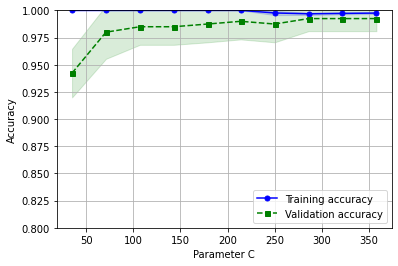

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv =10, n_jobs=1)
train_mean =np.mean(train_scores, axis =1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis = 1)
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
  train_mean + train_std,
  train_mean - train_std,
  alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
  color='green', linestyle='--',
  marker='s', markersize=5,
  label='Validation accuracy')
plt.fill_between(train_sizes,
  test_mean + test_std,
  test_mean - test_std,
  alpha=0.15, color='green')
plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.00])
plt.show()

<H1> Validation curves

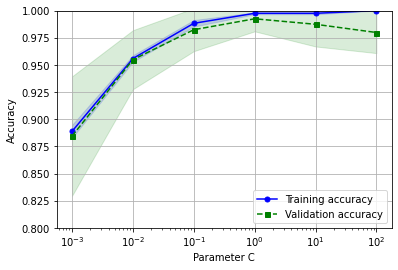

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train, y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv =10)
train_mean =np.mean(train_scores, axis =1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')
plt.fill_between(param_range,
  train_mean + train_std,
  train_mean - train_std,
  alpha=0.15, color='blue')
plt.plot(param_range, test_mean,
  color='green', linestyle='--',
  marker='s', markersize=5,
  label='Validation accuracy')
plt.fill_between(param_range,
  test_mean + test_std,
  test_mean - test_std,
  alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.00])
plt.show()

# Fine tuning via grid search

In ML we have 2 type of parameters, learned from training data and parameters of a learning algorithm that are optimized separately. <br>
Grid search can further improve the performance of a model by finding the optimal combination of hyperparameter values.

Just for who's being confused by hyperparameters and parameters.
<br> Hyperparameters are external parameters of a models, which cannot be derivied by the model itself, it is high level parameter that we set up before train our model, one example is the learning rate, you choose a learning rate(hyperparameter) then train the model, but once you got the model, you know what learning rate you used (because you chosed), but other cannot deduce the learning rate from the model. <br>
In other hand, parameters are internal of models and can be derivied from the model, example, the weights of the models, bias cluster etc....
<br>
So all these thing as learning curve, validation curve are just used to get the best hyperparameter to set for the next train.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
              'svc__gamma': param_range,
              'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
0.9846153846153847
print(gs.best_params_)
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

0.9924358974358973
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

The grid search approach is quite simple, brute-force exhaustive search paradigm, we specify a list of values for different hyperparameters and the computer evaluates the model performance for each combination to obtain the optimal one.

In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.959


# Confusion matrix

Is a simply square matrix that reports the counts of the true positive, true nevative, false positive, false negative.

In [7]:
from sklearn.metrics import confusion_matrix
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[105   2]
 [  8  56]]


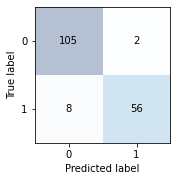

In [11]:
#Visual information
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j],va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

EER è la predizione errata, insieme all'accuracy viene utilizzata per prendere informazioni generali dei esempi misclassificati. <br>
EER = (FP + FN) / (Somma tutti F..)
Acc = 1- ERR
